In [3]:
import tweepy
from textblob import TextBlob
import csv
import matplotlib.pyplot as plt

In [9]:
consumer_key = '<Your consumer_key>'
consumer_secret = '<Your consumer_secret>'
access_token = '<Your access tokey>'
access_token_secret = '<Your token secret>'

In [12]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
topic = '<Your query>'
public_tweets = api.search(query,count=100)

In [13]:
tweet_sentiments =[]
#Opening the dataset.csv filefor writinh the tweets in it
with open('dataset.csv', mode='w', encoding ='utf-8') as tweets_file:
    tweet_writer = csv.writer(tweets_file, delimiter = ',', quotechar = '"', quoting = csv.QUOTE_MINIMAL)
    #Labelling the columns for the tweet dataset
    tweet_writer.writerow(['Tweet', 'Author', 'Date', 'Sentiment Polarity'])
    #Analyzing each tweet from the tweets list and storing it in a csv file
    for tweet in public_tweets:
        tweet_text = tweet.text
        tweet_user = tweet.user.name
        tweet_created_at = tweet.created_at
        tweet_sentiment = TextBlob(tweet_text).sentiment.polarity
        tweet_sentiments.append(TextBlob(tweet_text).sentiment.polarity)
#         print(tweet_text, tweet_user, tweet_created_at)
#         print("Sentiment is %f" % tweet_sentiment)
        tweet_writer.writerow([tweet_text, tweet_user, tweet_created_at, tweet_sentiment])
    print('Done')

Done


Text(0,0.5,'Frequency')

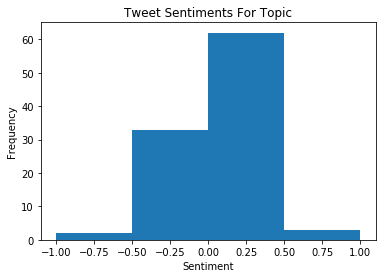

In [20]:
plt.hist(tweet_sentiments, bins=4, range=(-1,1))
plt.title("Tweet Sentiments For Topic")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")